## Aufgabe 1 - Moveout-Kurven 

Die erste Abbildung zeigt Moveout-Kurven für einen Reflektor in verschiedenen Tiefen aber für die gleiche Geschwindigkeitsverteilung. Die Laufzeiten sind dabei immer auf den ersten Ersteinsatz bei offset = 0 verschoben. Erklären und egründen Sie, in welchen der drei Abbildungen der Reklektor am tiefsten liegt. Lesen Sie ungefähre Werte ab un berechnen Sie die Tiefe des Reflektors für die dritte Abbildung unter der Annahme, dass die GEschwindigkeit der oberen Schicht 2500m beträgt.  

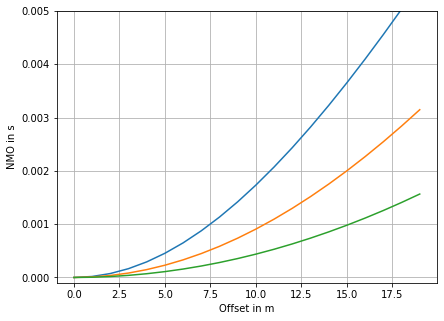

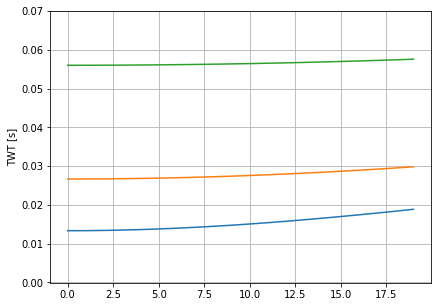

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec


z = np.array([10,20,42])
v = np.array([1500])
reflect = np.zeros([20,3])

#fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(18,5))
for j in range(3):
    
    for idx,x in enumerate(np.linspace(0,20,20)):

        reflect[idx,j] = 2*np.sqrt((x/2)**2 + z[j]**2)/v[0]
        
   
#plt.subplot(211)
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(reflect-reflect[0,:])
plt.ylim([-0.0001,0.005])
    #plt.gca().invert_yaxis()
plt.grid('on')
plt.ylabel('NMO in s')
plt.xlabel('Offset in m')

plt.figure(figsize=(15,5))
plt.subplot(122)
plt.plot(reflect)
plt.ylim([-0.0001,0.07])
plt.grid('on')
plt.ylabel('TWT [s]')

plt.show()

In [10]:
reflectA = 2*np.sqrt((7.5/2)**2 + 10**2)/1500-reflect[0,0] 
print(reflectA)

0.0009066729088625502


## Aufgabe 2 - NMO-Geschwindigkeit

Die folgende Abbildung zeigt im linken Teil ein Beispielseimsogramm einer Reflexionsseismik. Dieses Seismogramm soll im folgenden NMO-korrigiert werden. Dazu benötigt man die NMO-Velocity. Nhemen Sie an, dass der Reflektor in 100m Tiefe liegt. Berechnen Sie mithilfe des Seismogramms die NMO-Velocity und geben Sie Sie in das Programm ein. Der mittlere Plot zeigt dann das NMO-korrigierte Seismogramm, der rechte Plot eine Stapelung (Stack) aller NMO-korrigierten Spuren. Die Summenspur sollte einen klaren Peak haben . 


In [1]:
def wavelet(nT,dT,fdom):

    T = np.linspace(-nT*dT/2,nT*dT/2,nT);
    w = (2/np.sqrt(3*(1/fdom))*np.pi**(1/4)) *(1-(T**2/(1/fdom)**2)) * np.exp(-(T**2/(2*(1/fdom)**2)));
    return w

def plot_trace(A,t,x,w,ax):
    trace = x*np.ones(501)
    #print(A,w,x,t)
    trace[int(t*1000-len(w)/2):int(t*1000+len(w)/2)] = w*A + x
    time = np.linspace(0,.5,501)
    ax.plot(trace,time,'k-')
    ax.fill_betweenx(time,x,trace,where=(trace>x),color='k')
    return trace
   
    
## Geben Sie hier ihre NMO-Velocity ein - der voreingestellte Wert von 900m/s ist offensichtlich falsch !
    
v_NMO = 900; 
y_limits = [0.05,0.3] 



## Ab hier nichts mehr verändern !



sum_trace = np.zeros(501)
fig = plt.figure(figsize=(15, 5)) 
gs = gridspec.GridSpec(1, 3, width_ratios=[3,3, 1])
v_or = 1500
ax0 = plt.subplot(gs[0,0])
ax1 = plt.subplot(gs[0,1])
ax2 = plt.subplot(gs[0,2])
z = 100
w = wavelet(51,.001,200)




#fig,ax = plt.subplots(1,2,figsize=(15,5))
for idx,x in enumerate(np.linspace(0,200,20)):
    r = 2*np.sqrt((x/2)**2 + z**2)
    t = r/v_or
    A = 70/r
    plot_trace(A,t,x,w,ax0)
    dt = 2*np.sqrt((x/2)**2 + z**2)/v_NMO - 2*z/v_NMO
    trace = plot_trace(A,t-dt,x,w,ax1)
    sum_trace = sum_trace + trace -x

time = np.linspace(0,.5,501)

ax2.plot(sum_trace,time,'k-')
ax2.fill_betweenx(time,0,sum_trace,where=(sum_trace>0),color='k')

ax0.set_ylabel('Time [sec]')
ax0.set_xlabel('Offset [m]')
ax0.set_title('Normales Seismogramm')

ax1.set_ylabel('Time [sec]')
ax1.set_xlabel('Offset [m]')
ax1.set_title('NMO-korigiertes Seismogramm')
           
ax0.set_ylim(y_limits)
ax1.set_ylim(y_limits)
ax2.set_ylim(y_limits)


ax0.invert_yaxis()
ax1.invert_yaxis()
ax2.invert_yaxis()
ax2.set_title('Stacked Traces')
plt.show()


NameError: name 'np' is not defined